In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")

In [2]:
df = pd.read_csv('titanic.csv')
# View
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
print(df.shape)
df.describe()

(887, 8)


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


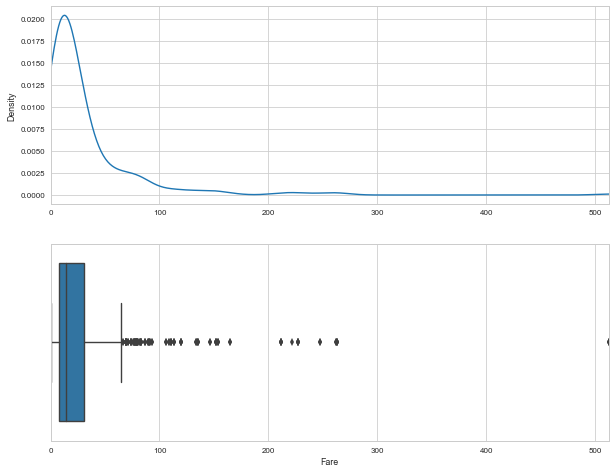

In [4]:
i = 'Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max())

ax = df[i].plot(kind='kde')
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max())
sns.boxplot(x=df[i])

In [5]:
df.loc[df.Fare == 0, 'Fare'] = np.nan
df.dropna(inplace=True)
df['Log_' + i] = np.log(df[i])
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Log_Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1.981001
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,4.266662
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,2.070022
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,3.972177
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,2.085672
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,2.564949
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,3.401197
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,3.154870
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,3.401197


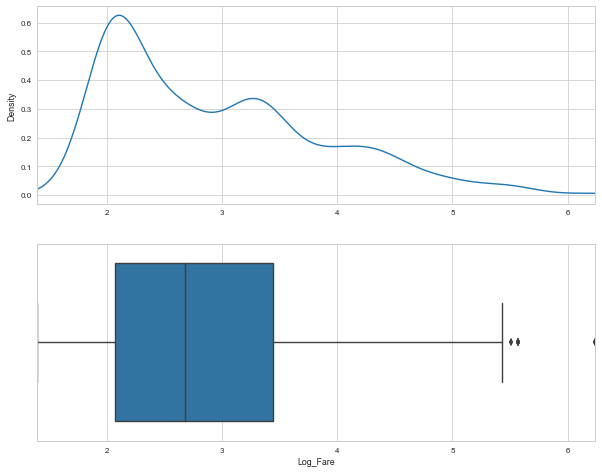

In [6]:
i='Log_Fare'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(),df[i].max())
         
ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max())
sns.boxplot(x=df[i])         

In [7]:
q75, q25 = np.percentile(df.Log_Fare.dropna(), [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
q75, q25 = np.percentile(df.Log_Fare.dropna(), [75 ,25])

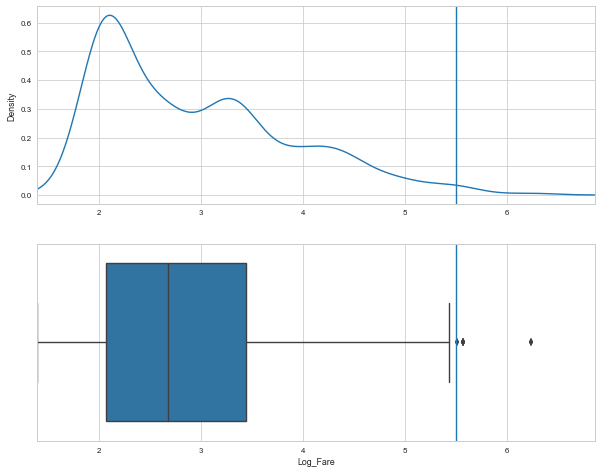

In [8]:
i = 'Log_Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [9]:
i = 'Log_Fare'
df = df[(df[i] >= min) & (df[i] <= max)]

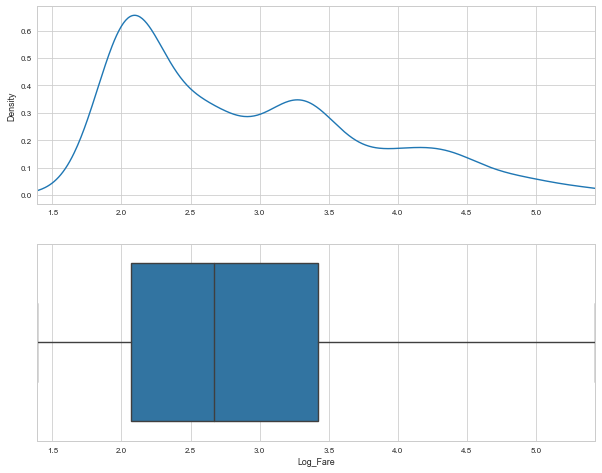

In [10]:
i='Log_Fare'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(),df[i].max())
         
ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max())
sns.boxplot(x=df[i]) 